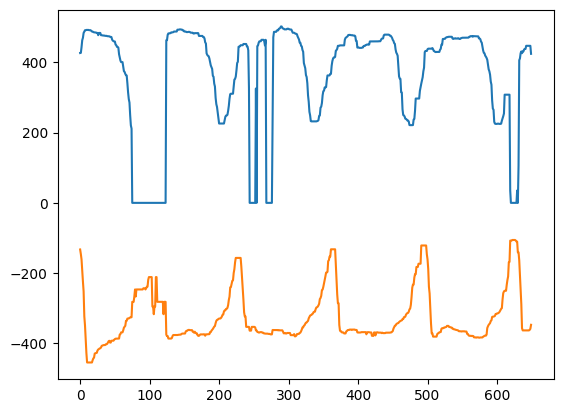

In [79]:
import json

from matplotlib import pyplot
from scipy.signal import medfilt

frame_count = []
wrist_x = []
ankle_x = []

with open("results/breast.json", "r") as f:
    data = json.load(f)
    for i, frame in enumerate(data):
        instance = frame['instances'][0]
        keypoints = instance['keypoints']
        scores = instance['keypoint_scores']

        right_wrist = keypoints[10]
        right_hip = keypoints[12]
        right_ankle = keypoints[16]

        # Frame Count
        frame_count.append(i)

        # Wrist
        wrist_relative_x = right_wrist[0] - right_hip[0]
        if wrist_relative_x < 0:
            wrist_relative_x = 0
        wrist_x.append(wrist_relative_x)

        # Ankle
        ankle_relative_x = right_ankle[0] - right_hip[0]
        if ankle_relative_x > 0:
            ankle_relative_x = 0
        ankle_x.append(ankle_relative_x)

pyplot.figure()
wrist_x = medfilt(wrist_x, kernel_size=15)
ankle_x = medfilt(ankle_x, kernel_size=15)
pyplot.plot(frame_count, wrist_x)
pyplot.plot(frame_count, ankle_x)
pyplot.show()

In [77]:
import cv2

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('data/breast.MP4')

# Check if camera opened successfully
if not cap.isOpened():
    print("Error opening video stream or file")

# Read until video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret:
        # Display the resulting frame
        cv2.imshow('Frame', frame)
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    # Break the loop
    else:
        break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()